In [119]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

figsize = (12, 6)

def summarise_datasets(all_data, names):
    means = []
    stds = []
    indexes = []

    for name in names:
        means.append(all_data[name].mean())
        stds.append(all_data[name].std())
        indexes.append(name)

    df_mean = pd.DataFrame(means, index = indexes)
    df_std = pd.DataFrame(stds, index = indexes)

    return df_mean, df_std

def do_ttest(all_data, label1, label2):
    """ Wrapper around scipy ttest_ind, using Welch's t-test"""
    label1_data = all_data[label1]
    label2_data = all_data[label2]

    cat1 = label1_data["Reproj."]
    cat2 = label2_data["Reproj."]
    reproj = ttest_ind(cat1, cat2, equal_var=False)
          
    cat1 = label1_data["Recon."]
    cat2 = label2_data["Recon."]
    recon = ttest_ind(cat1, cat2, equal_var=False)
    
    cat1 = label1_data["Tracked Reproj."]
    cat2 = label2_data["Tracked Reproj."]
    tracked_reproj = ttest_ind(cat1, cat2, equal_var=False)
    
    cat1 = label1_data["Tracked Recon."]
    cat2 = label2_data["Tracked Recon."]
    tracked_recon = ttest_ind(cat1, cat2, equal_var=False)
    
    print(f"Reprojection p-value: {reproj.pvalue}")
    print(f"Reconstruction p-value: {recon.pvalue}")
    print(f"Tracked Reprojection p-value: {tracked_reproj.pvalue}")
    print(f"Tracked Reconstruction p-value: {tracked_recon.pvalue}")

    return reproj, recon, tracked_reproj, tracked_recon

# Load in calibration results from .csv files

In [120]:
calib_data = {}

path = './results'
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

for csv in csv_files:
    file = os.path.join(path, csv)
    data_name = csv.split('.')[0]
    calib_data[data_name] = pd.read_csv(file, index_col = 0)

# Summary statistics for rig & freehand calibration

Mean Values


,Reproj.,Recon.,Tracked Reproj.,Tracked Recon.,Mean Frame Grab Time,Mean Calibration Time
charuco_rig,0.357155,2.164144,0.994648,2.229784,2.097287,11.624119
dots_rig,1.233714,1.469214,1.556601,1.468857,2.462134,42.359473
charuco_freehand,1.343829,2.232005,4.242161,3.367961,1.735755,22.619610


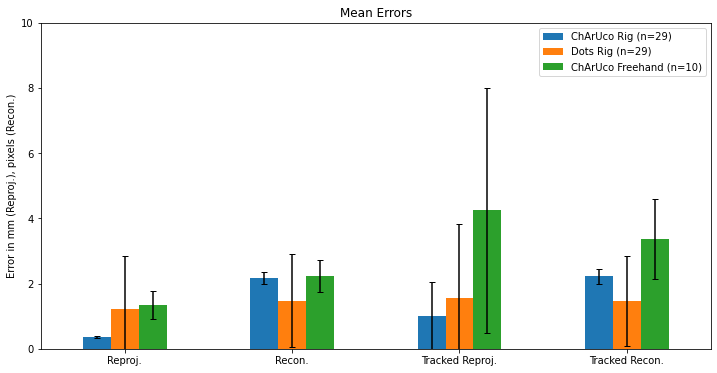

In [122]:
means, stds = summarise_datasets(calib_data, ["charuco_rig", "dots_rig", "charuco_freehand"])
columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

labels = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

fig1 = plt.figure(figsize=(figsize))
ax1 = fig1.add_subplot(1, 1, 1)

means[columns_to_plot].transpose().plot.bar(title="Mean Errors", ax=ax1, yerr=stds.transpose(), ecolor='black', capsize=3, rot=0, legend=None, ylabel="Error in mm (Reproj.), pixels (Recon.)")
ax1.set_ylim(0, 10)

n_charuco_rig = len(calib_data["charuco_rig"])
n_dots_rig = len(calib_data["dots_rig"])
n_charuco_freehand = len(calib_data["charuco_freehand"])

L = ax1.legend()
legend = [f"ChArUco Rig (n={n_charuco_rig})", f"Dots Rig (n={n_dots_rig})", f"ChArUco Freehand (n={n_charuco_freehand})"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])
L.get_texts()[2].set_text(legend[2])

plt.savefig('plots/ch_fh_ch_rig_dots_rig_mean.png', dpi=600)

print("Mean Values")
means


# Freehand vs Rig (ChArUco)

Reprojection p-value: 4.032037116724841e-05
Reconstruction p-value: 0.683496058242653
Tracked Reprojection p-value: 0.023277164425755694
Tracked Reconstruction p-value: 0.016017040463973852


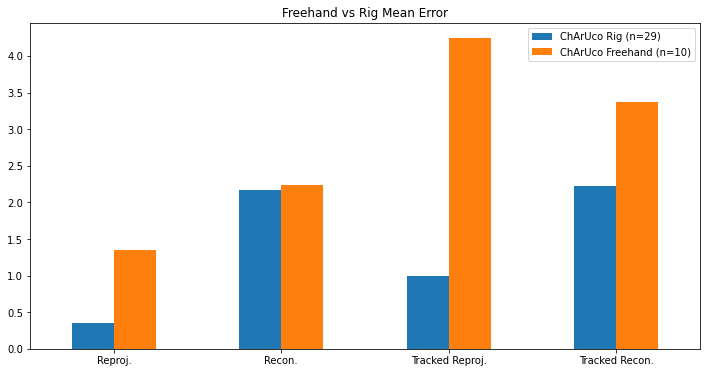

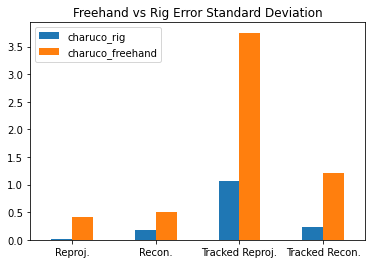

In [123]:
freehand_vs_rig_mean, freehand_vs_rig_std = summarise_datasets(calib_data, ["charuco_rig", "charuco_freehand"])
columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

fig1 = plt.figure(figsize=(figsize))
ax1 = fig1.add_subplot(1, 1, 1)

freehand_vs_rig_mean[columns_to_plot].transpose().plot.bar(ax=ax1, title="Freehand vs Rig Mean Error", rot=0)
freehand_vs_rig_std[columns_to_plot].transpose().plot.bar(title="Freehand vs Rig Error Standard Deviation", rot=0)

n_charuco_rig = len(calib_data["charuco_rig"])
n_charuco_freehand = len(calib_data["charuco_freehand"])

L = ax1.legend()
legend = [f"ChArUco Rig (n={n_charuco_rig})", f"ChArUco Freehand (n={n_charuco_freehand})"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])

t_test_vals = do_ttest(calib_data, "charuco_rig", "charuco_freehand")


# Charuco vs Dots

Reprojection p-value: 0.006586580078875887
Reconstruction p-value: 0.014393658536690357
Tracked Reprojection p-value: 0.23275343367052626
Tracked Reconstruction p-value: 0.006395170492208622


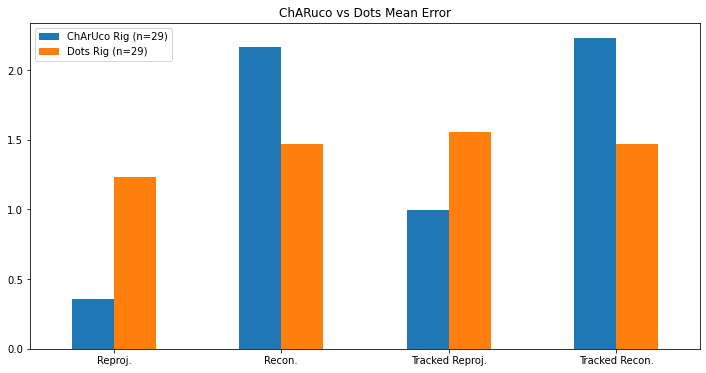

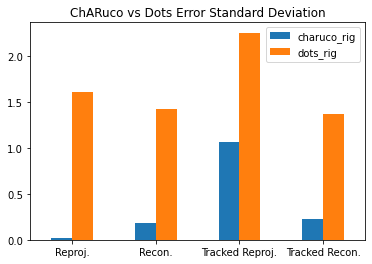

In [124]:
charuco_vs_dots_mean, charuco_vs_dots_std = summarise_datasets(calib_data, ["charuco_rig", "dots_rig"])

columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

fig1 = plt.figure(figsize=(figsize))
ax1 = fig1.add_subplot(1, 1, 1)

charuco_vs_dots_mean[columns_to_plot].transpose().plot.bar(ax=ax1, title="ChARuco vs Dots Mean Error", rot=0)
charuco_vs_dots_std[columns_to_plot].transpose().plot.bar(title="ChARuco vs Dots Error Standard Deviation", rot=0)

n_charuco_rig = len(calib_data["charuco_rig"])
n_dots_rig = len(calib_data["dots_rig"])

L = ax1.legend()
legend = [f"ChArUco Rig (n={n_charuco_rig})", f"Dots Rig (n={n_dots_rig})"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])

# calib_data["charuco_rig"][columns_to_plot].plot(title="Charuco Rig")
# calib_data["dots_rig"][columns_to_plot].plot(title="Dots Rig")

results = do_ttest(calib_data, "dots_rig", "charuco_rig")

# Iterative vs. Non-iterative Charuco

Reprojection p-value: 2.3600001671409353e-09
Reconstruction p-value: 9.04275634866715e-07
Tracked Reprojection p-value: 0.32600140202833083
Tracked Reconstruction p-value: 1.944131796649169e-05


,Reproj.,Recon.,Tracked Reproj.,Tracked Recon.,Mean Frame Grab Time,Mean Calibration Time
charuco_rig,0.357155,2.164144,0.994648,2.229784,2.097287,11.624119
charuco_rig-iterative,0.413698,2.550631,0.769372,2.598483,1.987256,95.669005


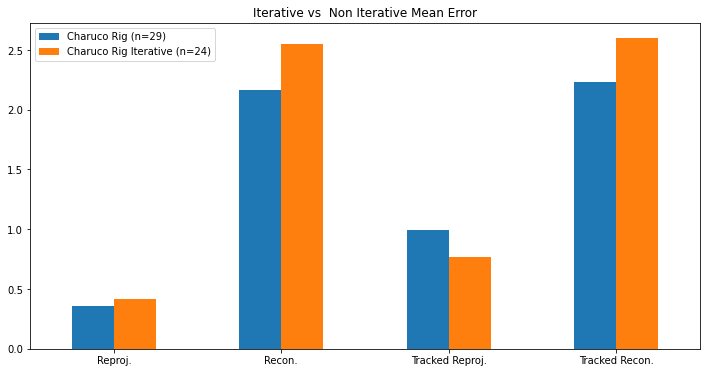

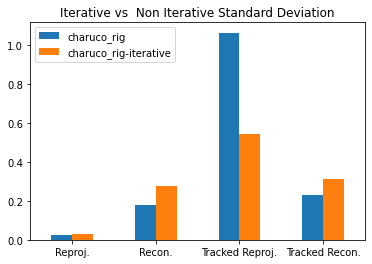

In [125]:
iterative_vs_non_iterative_mean, iterative_vs_non_iterative_std = summarise_datasets(calib_data, ["charuco_rig", "charuco_rig-iterative"])

columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

fig1 = plt.figure(figsize=(12,6))
ax1 = fig1.add_subplot(1, 1, 1)

iterative_vs_non_iterative_mean[columns_to_plot].transpose().plot.bar(ax=ax1, title="Iterative vs  Non Iterative Mean Error", rot=0)
iterative_vs_non_iterative_std[columns_to_plot].transpose().plot.bar(title="Iterative vs  Non Iterative Standard Deviation", rot=0)

n_rig = len(calib_data["charuco_rig"])
n_iterative = len(calib_data["charuco_rig-iterative"])

L = ax1.legend()
legend = [f"Charuco Rig (n={n_rig})", f"Charuco Rig Iterative (n={n_iterative})"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])

do_ttest(calib_data, "charuco_rig-iterative", "charuco_rig")
iterative_vs_non_iterative_mean

# Iterative  vs non-iterative, dots

Reprojection p-value: 2.3600001671409353e-09
Reconstruction p-value: 9.04275634866715e-07
Tracked Reprojection p-value: 0.32600140202833083
Tracked Reconstruction p-value: 1.944131796649169e-05


,Reproj.,Recon.,Tracked Reproj.,Tracked Recon.,Mean Frame Grab Time,Mean Calibration Time
dots_rig,1.233714,1.469214,1.556601,1.468857,2.462134,42.359473
dots_rig-iterative,0.894219,0.971230,1.149157,0.974664,2.613706,99.822717


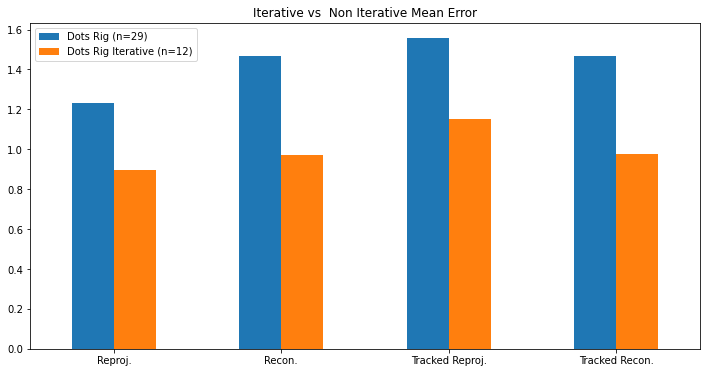

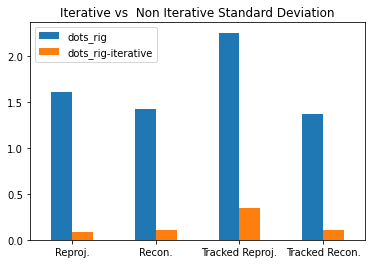

In [126]:
iterative_vs_non_iterative_mean, iterative_vs_non_iterative_std = summarise_datasets(calib_data, ["dots_rig", "dots_rig-iterative"])

columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

fig1 = plt.figure(figsize=(12,6))
ax1 = fig1.add_subplot(1, 1, 1)

iterative_vs_non_iterative_mean[columns_to_plot].transpose().plot.bar(ax=ax1, title="Iterative vs  Non Iterative Mean Error", rot=0)
iterative_vs_non_iterative_std[columns_to_plot].transpose().plot.bar(title="Iterative vs  Non Iterative Standard Deviation", rot=0)


n_dots_rig = len(calib_data["dots_rig"])
n_dots_iterative = len(calib_data["dots_rig-iterative"])

L = ax1.legend()
legend = [f"Dots Rig (n={n_dots_rig})", f"Dots Rig Iterative (n={n_dots_iterative})"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])

do_ttest(calib_data, "charuco_rig-iterative", "charuco_rig")
iterative_vs_non_iterative_mean

# Iterative vs non-iterative freehand

Reprojection p-value: 0.0017038800293274023
Reconstruction p-value: 0.01449991865278253
Tracked Reprojection p-value: 0.5357527422573363
Tracked Reconstruction p-value: 0.38573575902392676


,Reproj.,Recon.,Tracked Reproj.,Tracked Recon.,Mean Frame Grab Time,Mean Calibration Time
charuco_freehand,1.343829,2.232005,4.242161,3.367961,1.735755,22.619610
charuco_freehand-iterative,0.759879,1.490722,3.281443,2.515439,1.343458,106.967968


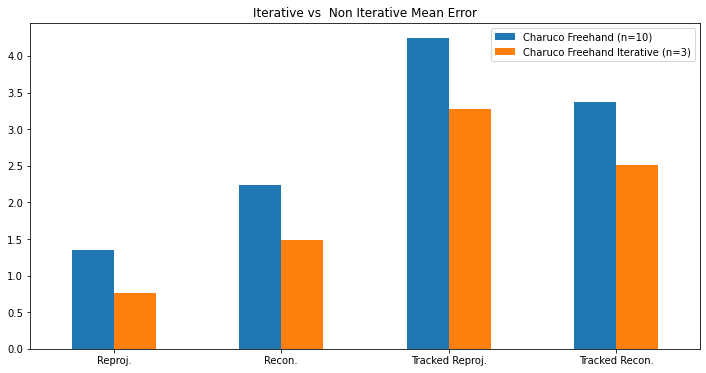

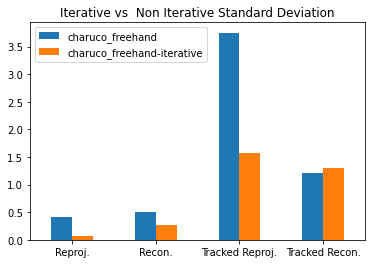

In [127]:
iterative_vs_non_iterative_mean, iterative_vs_non_iterative_std = summarise_datasets(calib_data, ["charuco_freehand", "charuco_freehand-iterative"])

columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

fig1 = plt.figure(figsize=(12,6))
ax1 = fig1.add_subplot(1, 1, 1)

iterative_vs_non_iterative_mean[columns_to_plot].transpose().plot.bar(ax=ax1, title="Iterative vs  Non Iterative Mean Error", rot=0)
iterative_vs_non_iterative_std[columns_to_plot].transpose().plot.bar(title="Iterative vs  Non Iterative Standard Deviation", rot=0)

n_rig = len(calib_data["charuco_freehand"])
n_iterative = len(calib_data["charuco_freehand-iterative"])

L = ax1.legend()
legend = [f"Charuco Freehand (n={n_rig})", f"Charuco Freehand Iterative (n={n_iterative})"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])

do_ttest(calib_data, "charuco_freehand-iterative", "charuco_freehand")
iterative_vs_non_iterative_mean